# Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Проект

### Описание фич

- PassengerId : A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet : The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep : Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin : The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination : The planet the passenger will be debarking to.
- Age : The age of the passenger.
- VIP : Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name : The first and last names of the passenger.
- Transported : Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Постановка задачи

Огибая Альфу Центавра по пути к своему первому пункту назначения — знойной 55 Cancri E — неосторожный космический корабль "Титаник" столкнулся с пространственно-временной аномалией, скрытой в пылевом облаке. К сожалению, его постигла та же участь, что и его тезку 1000 лет назад. Хотя корабль остался нетронутым, почти половина пассажиров была перенесена в альтернативное измерение.

Чтобы помочь спасательным бригадам и вернуть потерянных пассажиров, предстоит предсказать, какие пассажиры были перевезены аномалией, используя записи, восстановленные из поврежденной компьютерной системы космического корабля.

### Оценка

Предсказания оцениваниются с помощью метрики: Accurancy (процент правильных предсказанных меток)

# Импорт датасетов

In [4]:
train = pd.read_csv(r'data\train.csv')
X_test = pd.read_csv(r'data\test.csv')
y_test = pd.read_csv(r'data\sample_submission.csv')

# Предобработка

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
y_test.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [10]:
train.info()
print('_'*40)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [9]:
# Объединение датасетов
test = pd.merge(X_test, y_test, how='left', left_on='PassengerId', right_on='PassengerId')
df = pd.concat([train, test], ignore_index=True)

# Небольшая предобработка
df['Transported'] = df['Transported'].astype(int)

# Проверка объединения
df.iloc[8692:8695]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,1
8693,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
8694,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0


# Визуализация

<AxesSubplot:>

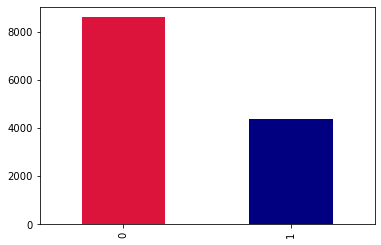

In [10]:
# Количество транспортировавшихся
df['Transported'].value_counts().plot(kind='bar', color=["crimson", "navy"])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

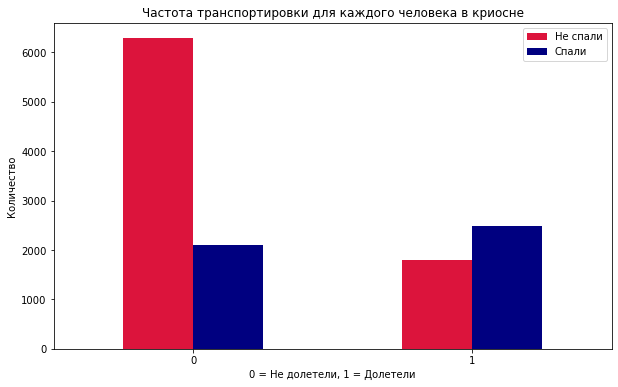

In [11]:
# Сравнение столбцов долетевших со столбцом Криосна человека
pd.crosstab(df['Transported'], df['CryoSleep']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["crimson", "navy"])
plt.title("Частота транспортировки для каждого человека в криосне")
plt.xlabel("0 = Не долетели, 1 = Долетели")
plt.ylabel("Количество")
plt.legend(["Не спали", "Спали"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

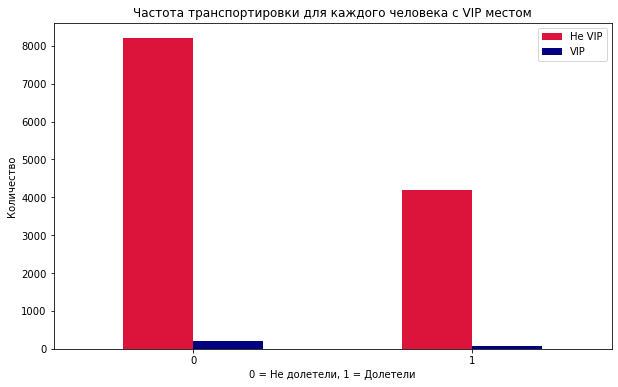

In [12]:
# Сравнение столбцов долтевших с VIP местами
pd.crosstab(df['Transported'], df['VIP']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["crimson", "navy"])
plt.title("Частота транспортировки для каждого человека с VIP местом")
plt.xlabel("0 = Не долетели, 1 = Долетели")
plt.ylabel("Количество")
plt.legend(["Не VIP", "VIP"])
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Earth'), Text(1, 0, 'Europa'), Text(2, 0, 'Mars')])

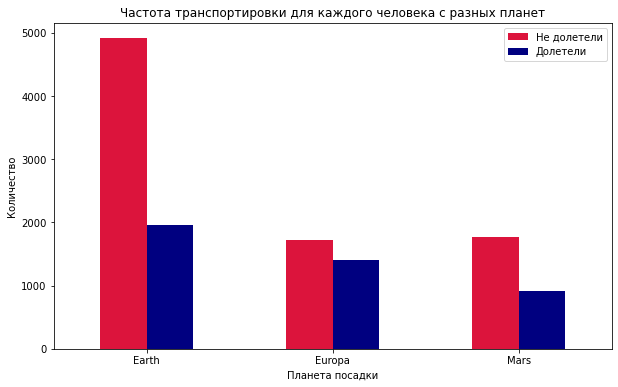

In [13]:
# Сравнение столбцов долтевших с платенами пасадки пассажиров
pd.crosstab(df['HomePlanet'], df['Transported']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["crimson", "navy"])
plt.title("Частота транспортировки для каждого человека с разных планет")
plt.xlabel("Планета посадки")
plt.ylabel("Количество")
plt.legend(["Не долетели", "Долетели"])
plt.xticks(rotation=0)

(7.5, -0.5)

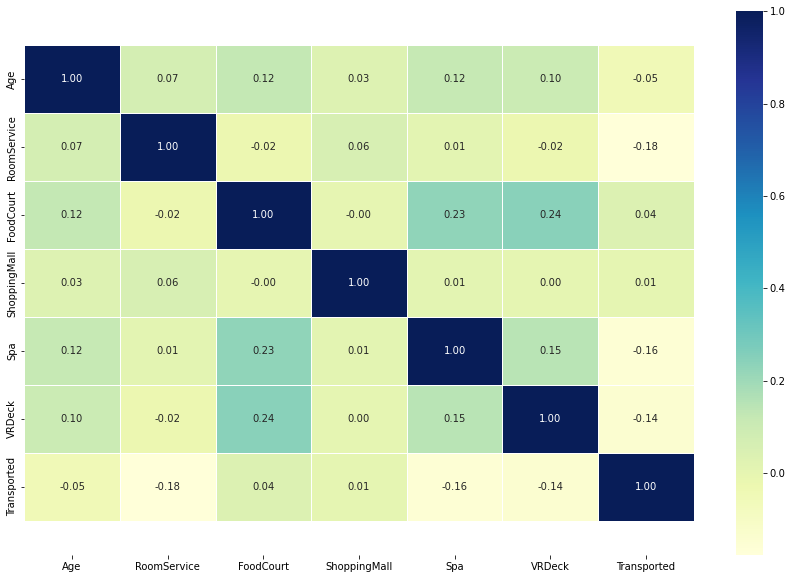

In [14]:
# Корреляция
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Заполнение пропуков с применением Pipeline

In [15]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   12970 non-null  int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 1.3+ MB


In [17]:
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

In [18]:
df.HomePlanet.value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [19]:
df.Cabin.value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [20]:
df.Destination.value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

Выбор кодирования элементов падает на два кодировщика - OneHotEncoder и Label Encoder. У обоих кодировщиков есть недостатки. 
- OneHotEncoder - увеличивает объем данных
- Label Encoder - создает избыточные зависимости в данных

Поскольку ограничений на память никаких нет, воспользуюсь OneHotEncoder

In [21]:
df = df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [22]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

In [24]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestClassifier())
])

## Разделение модели

In [25]:
train = df.iloc[:8693, :]
test = df.iloc[8693:, :]

In [26]:
X_train = train.drop('Transported', axis=1)
y_train = train['Transported']

X_test = test.drop('Transported', axis=1)
y_test = test['Transported']

## Использование GridSearchCV и Pipeline

In [27]:
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2,4]
}

In [28]:
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP']),
                                

In [29]:
gs_model.score(X_test, y_test)

0.4839841010053776

In [38]:
y_pred = gs_model.predict(X_test).astype(bool)

# Выгрузка результатов

In [39]:
test = pd.read_csv(r'data\test.csv')

In [40]:
index = test['PassengerId']
pred = pd.DataFrame({"PassengerId": index, "Transported": y_pred})
pred.reset_index(drop=True, inplace = True)
pred.to_csv('submission.csv', index = False)